In [8]:
import pandas as pd

df = pd.read_pickle('positive_sentiment_df.pkl')
df.head()

,productAsin,country,date,isVerified,ratingScore,reviewUrl,reviewedIn,variant,variantAsin,reviews,sentiment_scores,sentiment,rating_sentiment
0,B09G9BL5CP,India,11-08-2024,True,4,https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,charger every thing good iphones nothing compa...,0.7650,positive,positive
1,B09G9BL5CP,India,16-08-2024,True,5,https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,iphone gb look fabulous android user switched ...,0.9545,positive,positive
2,B09G9BL5CP,India,14-05-2024,True,4,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,flip camera option nill tried flip camera reco...,-0.1531,negative,positive
3,B09G9BL5CP,India,24-06-2024,True,5,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,product genuine,0.0000,positive,positive
4,B09G9BL5CP,India,18-05-2024,True,5,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,good product happy get iphone amazon offer,0.8074,positive,positive


In [18]:
import nltk
from nltk.tokenize import word_tokenize

generic_words = {'phone', 'great', 'good', 'excellent', 'amazing', 'best', 'love', 'like', 'nice', 'product', ' ', '\u200e', '\'', '’'}

def extract_words(review):
    words = word_tokenize(review.lower())
    return [word for word in words if word not in generic_words]

important_words = []
for review in df['reviews']:
    important_words.extend(extract_words(review))

In [19]:
from collections import Counter

word_counts = Counter(important_words)
top_words = word_counts.most_common(10)

In [20]:
print(top_words)

[('iphone', 1120), ('battery', 584), ('camera', 534), ('not', 393), ('quality', 382), ('apple', 342), ('new', 330), ('android', 275), ('one', 254), ('life', 234)]


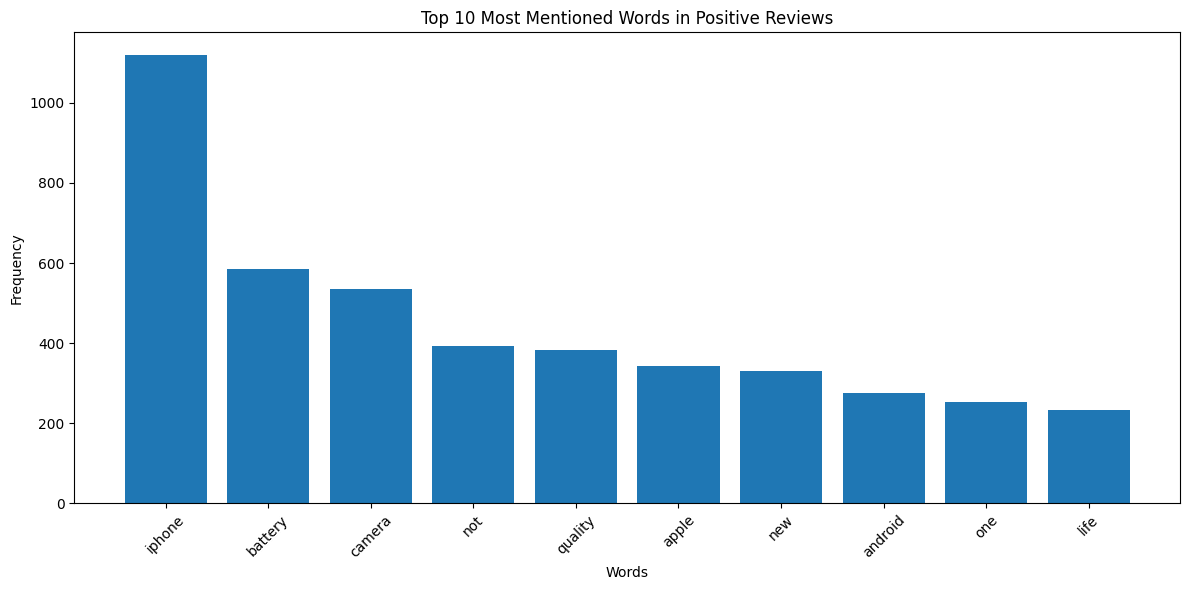

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar([word for word, count in top_words], [count for word, count in top_words])
plt.title('Top 10 Most Mentioned Words in Positive Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
word_sentiments = {}
for word, _ in top_words:
    word_reviews = df[df['reviews'].str.contains(word, case=False)]
    word_sentiments[word] = word_reviews['sentiment_scores'].mean()

In [23]:
print("\nAverage sentiment scores for top words:")
for word, score in word_sentiments.items():
    print(f"{word}: {score:.4f}")


Average sentiment scores for top words:
iphone: 0.7463
battery: 0.7717
camera: 0.8038
not: 0.6696
quality: 0.7617
apple: 0.7575
new: 0.7855
android: 0.8341
one: 0.7258
life: 0.8573


Distribution of recommendation categories:
Most Likely to Recommend: 54.8%
Least Likely to Recommend: 30.05%
Might Recommend: 15.15%


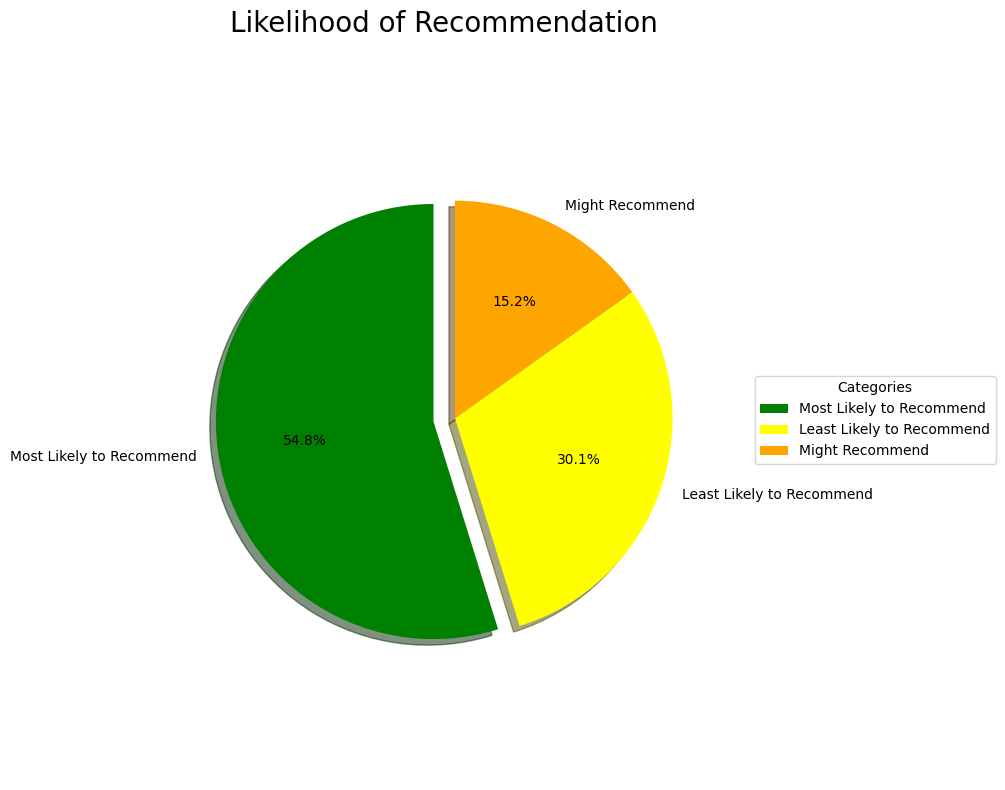

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sentiment analysis DataFrame
df = pd.read_pickle('sentiment_analysis_df.pkl')

# Define categories based on sentiment scores
def categorize_sentiment(score):
    if score >= 0.6:
        return 'Most Likely to Recommend'
    elif 0.2 <= score < 0.6:
        return 'Might Recommend'
    else:
        return 'Least Likely to Recommend'

df['recommendation_category'] = df['sentiment_scores'].apply(categorize_sentiment)

# Calculate percentages for each category
category_counts = df['recommendation_category'].value_counts()
total = len(df)
percentages = (category_counts / total * 100).round(2)

print("Distribution of recommendation categories:")
for category, percentage in percentages.items():
    print(f"{category}: {percentage}%")

# Create a pie chart
plt.figure(figsize=(10, 8))
colors = ['#008000', '#FFFF00', '#FFA500']
explode = (0.1, 0, 0)  # Explode the 'Most Likely to Recommend' slice

plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%',
        startangle=90, colors=colors, explode=explode, shadow=True)

plt.title('Likelihood of Recommendation', fontsize=20, pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend
plt.legend(percentages.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()